# 蚁群算法

----

## 任务目的

学习掌握蚁群算法的核心原理，即信息素和状态转移概率的计算方法，利用信息素来更新蚁群的位置，最终达到最优解。

## 任务内容

本次实验将撰写蚁群算法，不断更新蚁群的当前位置，求得最优解，最后利用三角函数和圆验证所设计算法的正确性。  
<a href='#初始化坐标'>初始化坐标</a><br/>
<a href='#参数定义'>参数定义</a><br/>
<a href='#迭代计算'>迭代计算</a><br/>

## 任务原理

粒子群算法(Ant Colony Optimization, ACO)是一种用来寻找优化路径的概率型算法，其灵感来源于蚂蚁在寻找食物过程中发现路径的行为，蚁群可以在不同的环境下，寻找最短到达食物源的路径。蚂蚁会在其经过的路径上释放一种称之为“信息素”的物质，蚁群内的蚂蚁对“信息素”具有感知能力，它们会沿着“信息素”浓度较高路径行走，而每只路过的蚂蚁都会在路上留下“信息素”，这就形成一种类似正反馈的机制，这样经过一段时间后，整个蚁群就会沿着最短路径到达食物源了。该算法可应用于组合优化问题，如旅行商问题、指派问题、Job—shop调度问题、车辆路由问题、图着色问题和网络路由问题等。  
<img src="../../image/MachineLearningAlgorithm/1-4.png" width="400" length="300">
在图1（a）中，有一群蚂蚁，假如A是蚁巢，E是食物源（反之亦然）。这群蚂蚁将沿着蚁巢和食物源之间的直线路径行驶。假如在A和E之间突然出现了一个障碍物（图1（b）），那么，在B点（或D点）的蚂蚁将要做出决策，到底是向左行驶还是向右行驶。由于一开始路上没有前面蚂蚁留下的信息素（pheromone），蚂蚁朝着两个方向行进的概率是相等的。但是当有蚂蚁走过时，它将会在它行进的路上释放出信息素，并且这种信息素会以一定的速率散发掉。信息素是蚂蚁之间交流的工具之一。它后面的蚂蚁通过路上信息素的浓度，做出决策，往左还是往右。很明显，沿着短边的的路径上信息素将会越来越浓（图1（c）），从而吸引了越来越多的蚂蚁沿着这条路径行驶。  
蚁群算法实现流程如下所示：  
将$m$只蚂蚁放置在$n$个随机城市上，其中$n$为TSP规模；$m$表示蚂蚁数量；C为TSP问题中城市的集合；$\tau_{ij}(t)$为t时刻在城市$i$和$j$路径上的信息量；$\eta_{ij}(t)$为启发式的因子，表示t时刻蚂蚁从城市i转移到城市j的期望程度，通常取$\eta_{ij}(t)$为相邻两城市间距离的倒数。  
（1）状态转移概率准则。每只蚂蚁根据各条路径上的信息量独立的选择下一个要转移的城市，并将蚂蚁k走过的城市记录在禁忌表tabu_k下。在t时刻蚂蚁k从城市i移动到城市j的状态转移概率$p^k_{ij}(t)$如下式所示。  
<img src="../../image/MachineLearningAlgorithm/1-5.png" width="500" length="300"> 
式中，$\alpha$为信息启发式因子，反映信息素对蚂蚁选择路径的影响力；$\beta$为期望启发式因子，表示路径长度对蚂蚁的影响程度；$allowed_k$为蚂蚁k下一步移动时可选的城市集合。  
（2）信息素更新。在所有蚂蚁完成一次遍历后，对路径上的残留信息作更新处理，各个路径上的信息素按照下式进行调整：  
<img src="../../image/MachineLearningAlgorithm/1-6.png" width="300" length="300"> 
式中，$\rho$为挥发系数，反映信息素的持久性$\rho\in(0,1)$；$\Delta\tau_{ij}(t)$为本次循环后路径（i，j）上的信息素增量； $\Delta\tau_{ij}^k(t)$示第k只蚂蚁在本次循环中留在路径上的信息量，这里采用Ant-Cycle模型定义$\Delta\tau_{ij}(t)$：   
<img src="../../image/MachineLearningAlgorithm/1-7.png" width="420" length="300"> 
式中，$L_k$为第k只蚂蚁在本次循环中所走路径的总长度，Q是蚂蚁完成一次完整路径搜索后释放的信息素总量。Ant-Cycle模型利用蚂蚁完成一次循环后的整体信息对路径上的信息素进行更新，其对TSP问题的求解性能较好。  


## 任务步骤

### 初始化坐标

1、添加如下所示的库文件和城市坐标矩阵。

```python
import os
import numpy as np  
import matplotlib.pyplot as plt  
import pdb 
import math
os.getcwd()
# 52个城市的坐标
coordinates = np.array([[565.0,575.0],[25.0,185.0],[345.0,750.0],[945.0,685.0],[845.0,655.0],  
[880.0,660.0],[25.0,230.0],[525.0,1000.0],[580.0,1175.0],[650.0,1130.0],  
[1605.0,620.0],[1220.0,580.0],[1465.0,200.0],[1530.0,5.0],[845.0,680.0],  
[725.0,370.0],[145.0,665.0],[415.0,635.0],[510.0,875.0],[560.0,365.0],  
[300.0,465.0],[520.0,585.0],[480.0,415.0],[835.0,625.0],[975.0,580.0],  
[1215.0,245.0],[1320.0,315.0],[1250.0,400.0],[660.0,180.0],[410.0,250.0],  
[420.0,555.0],[575.0,665.0],[1150.0,1160.0],[700.0,580.0],[685.0,595.0],  
[685.0,610.0],[770.0,610.0],[795.0,645.0],[720.0,635.0],[760.0,650.0],  
[475.0,960.0],[95.0,260.0],[875.0,920.0],[700.0,500.0],[555.0,815.0],  
[830.0,485.0],[1170.0, 65.0],[830.0,610.0],[605.0,625.0],[595.0,360.0],  
[1340.0,725.0],[1740.0,245.0]]) 
```

2、定义如下所示的参数，并计算不同城市间的坐标距离。

```python
# 邻接矩阵
def getdistmat(coordinates):  
    num = coordinates.shape[0]  
    distmat = np.zeros((52,52))  
    for i in range(num):  
        for j in range(i,num):  
            distmat[i][j] = distmat[j][i]=np.linalg.norm(coordinates[i]-coordinates[j])  
    return distmat  
distmat = getdistmat(coordinates)  # 邻接矩阵
```

### 参数定义

3、定义如下所示的矩阵，pathtable为蚂蚁的路径记录

```python
numant = 40 #蚂蚁个数  
numcity = coordinates.shape[0] #城市个数  
alpha = 1   #信息素重要程度因子  
beta = 5    #启发函数重要程度因子  
rho = 0.1   #信息素的挥发速度  
Q = 1  
iter = 0  
itermax = 20  
# 启发函数矩阵，表示蚂蚁从城市i转移到矩阵j的期望程度
etatable = 1.0/(distmat+np.diag([1e10]*numcity)) 
pheromonetable  = np.ones((numcity,numcity)) # 信息素矩阵  
pathtable = np.zeros((numant,numcity)).astype(int) #路径记录表  
# distmat = getdistmat(coordinates) #城市的距离矩阵
lengthaver = np.zeros(itermax) #各代路径的平均长度  
lengthbest = np.zeros(itermax) #各代及其之前遇到的最佳路径长度  
pathbest = np.zeros((itermax,numcity)) # 各代及其之前遇到的最佳路径长度  
```

### 迭代计算

4、如下所示，对蚂蚁的位置随机初始化。对第k只蚂蚁按照转移概率更行位置。

```python
while iter < itermax:  
    # 随机产生各个蚂蚁的起点城市  
    if numant <= numcity:#城市数比蚂蚁数多  
        pathtable[:,0] = np.random.permutation(range(0,numcity))[:numant]  
    else: #蚂蚁数比城市数多，需要补足  
        pathtable[:numcity,0] = np.random.permutation(range(0,numcity))[:]  
        pathtable[numcity:,0] = np.random.permutation(range(0,numcity))[:numant-numcity]  
    length = np.zeros(numant) #计算各个蚂蚁的路径距离  
    for i in range(numant):    
        #i=0  
        visiting = pathtable[i,0] # 当前所在的城市  
        #visited = set() #已访问过的城市，防止重复  
        #visited.add(visiting) #增加元素  
        unvisited = set(range(numcity))#未访问的城市  
        
        unvisited.remove(visiting) #删除元素  
```

5、计算蚂蚁从城市i移动到城市j的状态转移概率cumsumprobtrans。代码中k值即为当前蚂蚁的下一个更新位置。Length值为当前蚂蚁已经移动的距离。

```python
        for j in range(1,numcity):#循环numcity-1次，访问剩余的numcity-1个城市  
            #j=1  
            #每次用轮盘法选择下一个要访问的城市  
            listunvisited = list(unvisited)    
            probtrans = np.zeros(len(listunvisited))    
            for k in range(len(listunvisited)):  
                probtrans[k] = np.power(pheromonetable[visiting][listunvisited[k]],alpha)\
                               *np.power(etatable[visiting][listunvisited[k]],alpha)  
            cumsumprobtrans = (probtrans/sum(probtrans)).cumsum()  
            cumsumprobtrans -= np.random.rand()  
            # k = listunvisited[find(cumsumprobtrans>0)[0]] #下一个要访问的城市
            k = listunvisited[list(cumsumprobtrans>0).index(True)] #下一个要访问的城市  
            pathtable[i,j] = k  
            unvisited.remove(k)  
            #visited.add(k)  
            length[i] += distmat[visiting][k]  
            visiting = k  
    #蚂蚁的路径距离包括最后一个城市和第一个城市的距离
        length[i] += distmat[visiting][pathtable[i,0]]    
    #print length  
    # 包含所有蚂蚁的一个迭代结束后，统计本次迭代的若干统计参数    
    lengthaver[iter] = length.mean()  
```

6、信息素更新。每次迭代后，求解当前每条路径的最短距离，并保存该值。Lengthbest为当前迭代下从城市的某一点出发到遍历完所有城市后的最短运动距离。按照实验原理中信息素更新公式，对路径上的信息素跟新。

```python
    if iter == 0:  
        lengthbest[iter] = length.min()  
        pathbest[iter] = pathtable[length.argmin()].copy()        
    else:  
        if length.min() > lengthbest[iter-1]:  
            lengthbest[iter] = lengthbest[iter-1]  
            pathbest[iter] = pathbest[iter-1].copy()  
        else:  
            lengthbest[iter] = length.min()  
            pathbest[iter] = pathtable[length.argmin()].copy()      
    # 更新信息素  
    changepheromonetable = np.zeros((numcity,numcity))  
    for i in range(numant):  
        for j in range(numcity-1):  
            changepheromonetable[pathtable[i,j]][pathtable[i,j+1]] += Q/distmat[pathtable[i,j]][pathtable[i,j+1]]  
        changepheromonetable[pathtable[i,j+1]][pathtable[i,0]] += Q/distmat[pathtable[i,j+1]][pathtable[i,0]]  
    pheromonetable = (1-rho)*pheromonetable + changepheromonetable 
    iter += 1 #迭代次数指示器+1  
# 做出平均路径长度和最优路径长度     
print(lengthbest)

```

[17556.48029961 17556.48029961 17556.48029961 17556.48029961
 17556.48029961 17556.48029961 17012.37560673 17012.37560673
 17012.37560673 16349.7890201  13591.33534246 13591.33534246
 13591.33534246 13591.33534246 13591.33534246 13591.33534246
 13591.33534246 13591.33534246 13591.33534246 13591.33534246]


7、绘制图形。执行以上程序后得到如下所示的程序，可见，随着迭代次数的增加，遍历完所有路径所需要的路径路程越短，并得到如下所示的最优的路径，图中蓝色直线即为起始点到终点，反之亦然。通过最短路径和平均距离的曲线图，可知所设计的蚁群算法的正确性（蚂蚁的起点是随机选择的）。

```python
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,10))  
axes[0,0].plot(lengthaver,'k',marker = u'')  
axes[0,0].set_title('Average Length')  
axes[0,0].set_xlabel(u'iteration')  
axes[1,0].plot(lengthbest,'k',marker = u'')  
axes[1,0].set_title('Best Length')  
axes[1,0].set_xlabel(u'iteration')  
#fig.savefig('Average_Best.png',dpi=500,bbox_inches='tight')
#plt.show()
#plt.close()  
#×÷³öÕÒµ½µÄ×îÓÅÂ·¾¶Í¼  
bestpath = pathbest[-1]  
axes[0,1].plot(coordinates[:,0],coordinates[:,1],'r.',marker=u'$\cdot$')  
axes[0,1].xaxis.limit_range_for_scale(-100,2000)  
axes[0,1].yaxis.limit_range_for_scale(-100,1500)  
for i in range(numcity-1):#  
    m,n = int(bestpath[i]),int(bestpath[i+1])
    print(m,n)
    axes[0,1].plot([coordinates[m][0],coordinates[n][0]],\
                   [coordinates[m][1],coordinates[n][1]],'k')
axes[0,1].plot([coordinates[ int(bestpath[0]) ][0],coordinates[n][0]],\
               [coordinates[ int(bestpath[0]) ][1],coordinates[n][1]],'b')  
#ax=plt.gca()  
axes[0,1].set_title("Best Path")  
axes[0,1].set_xlabel('X axis')  
axes[0,1].set_ylabel('Y_axis')  
#plt.savefig('Best Path.png',dpi=500,bbox_inches='tight')
plt.show()
#plt.close()

```

38 34
34 35
35 33
33 24
24 28
28 44
44 18
18 40
40 8
8 9
9 3
3 13
13 51
51 12
12 11
11 50
50 48
48 31
31 0
0 21
21 17
17 30
30 37
37 47
47 23
23 4
4 5
5 14
14 36
36 39
39 45
45 43
43 29
29 22
22 49
49 19
19 15
15 26
26 27
27 10
10 25
25 46
46 16
16 1
1 6
6 41
41 20
20 2
2 7
7 32
32 42


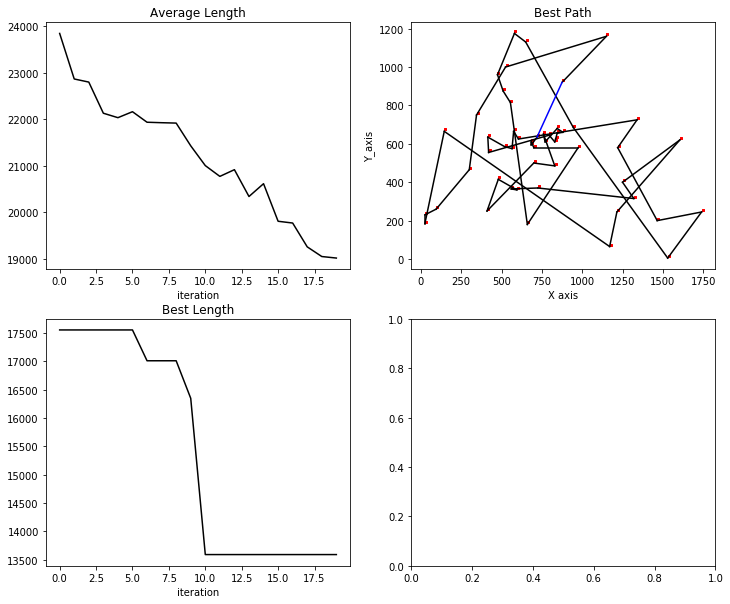

8、以上完成了多个城市最短路径的遍历，为了验证所设计的蚁群算法的正确性，修改原来的城市坐标为三角函数，如下所示。在cos函数一个周期中，使得遍历所有的点的路径和达到最小值，必定是按照cos函数的曲线轨迹遍历。可见所设计得到的结果和预想相同。  
<font color=#ff000>注意：用以下代码段替换上文中相应的代码段，并再次运行。 </font>

```python
import os
import numpy as np  
import matplotlib.pyplot as plt  
import pdb 
import math
os.getcwd()
# 52个城市的坐标
coordinates = np.array([[565.0,575.0],[25.0,185.0],[345.0,750.0],[945.0,685.0],[845.0,655.0],  
[880.0,660.0],[25.0,230.0],[525.0,1000.0],[580.0,1175.0],[650.0,1130.0],  
[1605.0,620.0],[1220.0,580.0],[1465.0,200.0],[1530.0,5.0],[845.0,680.0],  
[725.0,370.0],[145.0,665.0],[415.0,635.0],[510.0,875.0],[560.0,365.0],  
[300.0,465.0],[520.0,585.0],[480.0,415.0],[835.0,625.0],[975.0,580.0],  
[1215.0,245.0],[1320.0,315.0],[1250.0,400.0],[660.0,180.0],[410.0,250.0],  
[420.0,555.0],[575.0,665.0],[1150.0,1160.0],[700.0,580.0],[685.0,595.0],  
[685.0,610.0],[770.0,610.0],[795.0,645.0],[720.0,635.0],[760.0,650.0],  
[475.0,960.0],[95.0,260.0],[875.0,920.0],[700.0,500.0],[555.0,815.0],  
[830.0,485.0],[1170.0, 65.0],[830.0,610.0],[605.0,625.0],[595.0,360.0],  
[1340.0,725.0],[1740.0,245.0]]) 
x = [i for i in range(52)]
y = np.zeros(len(x))
coordinates = np.zeros([len(x),2])
angles_circle = [i*2*math.pi/52 for i in range(0,52)]                
i = 0
for angles in angles_circle:
    x = 10*math.cos(angles)
    y = 10*math.sin(angles)
    coordinates[i] = [x,y]
    i=i+1
```

9、为了消除起始点的影响，设计一个半径为10的闭环圆（同样离散为52个数据点），并将这些数据点随机化。利用这些离散点的最短路径来计算圆的周长，得到如下所示的圆周长为62.79，与62.83理论值接近。(代码截图不提供，学生自主完成此部分内容)。